# Modelos de Regresión Lineal
## Modelo con datos simulados

* $y = \alpha + \beta · x$

* $X$: 100 valores distribuidos según una N(1.5, 2.5)

* $Y_e = 10 + 1.9 · x$ 

* $e$ estará distribuida según una N(0, 0.8)

El error debe distribuirse según una normal de media 0 para no provocar desplazamientos en el modelo.

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)
res = 0 + 0.8 * np.random.randn(100)
y_pred = 10 + 1.9 * x
y_act = 10 + 1.9 * x + res

In [3]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [4]:
data = pd.DataFrame(
    {
        'x':x_list,
        'y_actual':y_act_list,
        'y_predic':y_pred_list
    }
)
data.head()

,x,y_actual,y_predic
0,5.159958,19.543084,19.803920
1,-0.663399,8.163106,8.739542
2,-1.486171,6.643559,7.176274
3,-1.369750,7.068225,7.397476
4,-0.092814,9.369604,9.823654


Ahora queremos comprobar que tan ajustada es la predicción respecto a los valores que tenemos.

In [5]:
import matplotlib.pyplot as plt

El promedio es el modelo de estamación que empleamos para contrastar nuestro modelo de regresión lineal. A continuación los dibujamos a ambos para ver como se comportan las predicciones de la regresión frente a uno y otro modelo.

In [6]:
# Añadimos una horizontal en el promedio de las x
y_mean = [np.mean(y_act) for i in range(len(x_list))]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

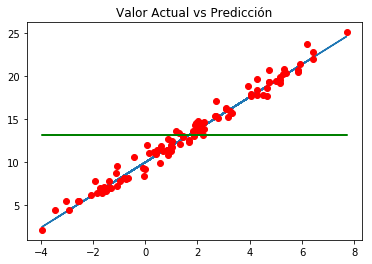

In [7]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Predicción")

* Una forma de juzgar la eficacia de nuestro modelo es evaluar si el promedio de los valores es un buen predictor.

* Otra forma es evaluar los valores que genera python de $\alpha$ y $\beta$.

In [38]:
from IPython.display import Image

De un dato observado (predicho?) cualquiera 

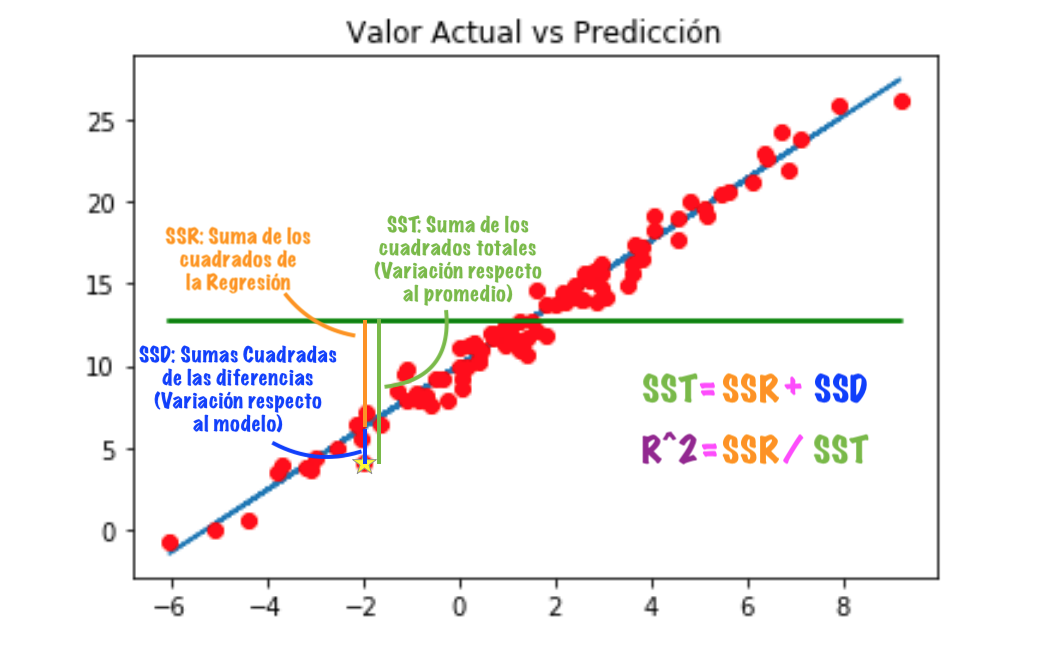

In [39]:
Image(filename = "resources/regresion.png")

## Comprobación

In [10]:
data["SSR"] = (data['y_predic'] - np.mean(y_act))**2
data["SSD"] = (data['y_predic'] - data['y_actual'])**2
data["SST"] = (data['y_actual'] - np.mean(y_act))**2
data.head()

,x,y_actual,y_predic,SSR,SSD,SST
0,5.159958,19.543084,19.803920,43.171409,0.068035,39.811801
1,-0.663399,8.163106,8.739542,20.194976,0.332279,25.708132
2,-1.486171,6.643559,7.176274,36.689069,0.283786,43.426327
3,-1.369750,7.068225,7.397476,34.058298,0.108406,38.009687
4,-0.092814,9.369604,9.823654,11.626536,0.206161,14.929105


In [11]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])
print(SSR, SSD, SST)

2525.720368425784 55.94107982423916 2596.1233951927456


Sumando SSR y SSD tendríamos que obtener un valor aproximado a SST

In [12]:
SSR + SSD

2581.661448250023

La diferencia puede deberse al error acumulado de operar con decimales. Normalemente el valor de SSD se infiere de la resta de SSR y SST.

In [13]:
R2 = SSR / SST
R2

0.9728814790170115

Vemos como los errores (SSD) se distribuyen como una normal.

(array([ 5.,  6.,  3.,  9., 20., 15., 20., 16.,  3.,  3.]),
 array([-1.98156427, -1.63655937, -1.29155446, -0.94654956, -0.60154465,
        -0.25653974,  0.08846516,  0.43347007,  0.77847497,  1.12347988,
         1.46848479]),
 <a list of 10 Patch objects>)

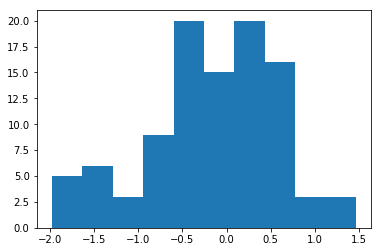

In [14]:
plt.hist(data['y_predic'] - data['y_actual'])

En las condiciones obtenidas para el error:

* SSD es pequeña (71.9 de 2992.5, es un 3% aprox que el modelo no puede explicar)
* SSD se distribuye como una normal

**Se puede concluir que la regresión ha sido buena**

## Estimación de los parámetros de regresión por la técnica de los mínimos cuadrados (optimización)

Volvemos al dataset inventado para predecir la `y_actual`. Es decir, para tenerla como variable de salida.

Recordamos que el procedimiento era:
   
   * $y = \alpha + \beta · x$
   * $\beta = \frac{Cov(x,y)}{Var(x)} = \frac{\sum_{i=1}^n(x_i - \overline{x})(y_i-\overline{y})}{\sum_{i=1}^n(x_i -\overline{x})^2}$
   * $\alpha = y_n - \beta · x_m$
   

In [15]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_actual'])
x_mean, y_mean

(1.6159714867311756, 13.233424453581918)

Calculamos $\beta$ por partes:

In [16]:
data['beta_num'] = (data['x'] - x_mean) * (data['y_actual'] - y_mean)
data['beta_den'] = (data['x'] - x_mean)**2

In [17]:
beta = sum(data['beta_num']) / sum(data['beta_den'])
alpha = y_mean - beta * x_mean

Vemos que los $\alpha$ y $\beta$ obtenidos se asemejan a los $\alpha$ y $\beta$ que habíamos planteado al inicio de 10 y 1.9.

In [18]:
alpha, beta

(10.151042826134852, 1.9074480290999307)

El modelo lineal obtenido por regresión es:

$y = 9.913897677831436 + 1.8915798457948694 · x$

Para comprobar como se comporta el nuevo modelo (si es más preciso que el que habíamos planteado al inicio), comprobaremos como se comporta $R^2$.

In [19]:
data['y_model'] = alpha + beta * data['x']
data.head()

,x,y_actual,y_predic,SSR,SSD,SST,beta_num,beta_den,y_model
0,5.159958,19.543084,19.803920,43.171409,0.068035,39.811801,22.361346,12.559839,19.993394
1,-0.663399,8.163106,8.739542,20.194976,0.332279,25.708132,11.557133,5.195529,8.885644
2,-1.486171,6.643559,7.176274,36.689069,0.283786,43.426327,20.442705,9.623291,7.316248
3,-1.369750,7.068225,7.397476,34.058298,0.108406,38.009687,18.407567,8.914531,7.538317
4,-0.092814,9.369604,9.823654,11.626536,0.206161,14.929105,6.602439,2.919947,9.974005


Ahora lo comprobamos calculando el error de la suma de cuadrados.

In [20]:
SSR_m = sum((data['y_model'] - y_mean)**2)
SSD_m = sum((data['y_model'] - data['y_actual'])**2)
SST_m = sum((data['y_actual'] - np.mean(y_act))**2)
SSR_m, SSD_m, SST_m

(2542.880549951441, 53.24284524130751, 2596.1233951927456)

In [21]:
R2 = SSR_m / SST_m
R2

0.9794914042453088

Vemos que el $R^2$ del modelo se comporta práctiacmente igual que el $R^2$ del modelo original (0.9766... $\approx$ 0.9857...) y muy cercano a 1.

Un valor cercano a 1 representa que la suma de los cuadrados de la regresión y la suma de los cuadrados de los totales se asemejan, lo cual solo es posible cuando el error es pequeño.

También lo podemos ver contrastando la función original con el modelo que acabamos de comprobar.

Text(0.5, 1.0, 'Valor Actual vs Predicción')

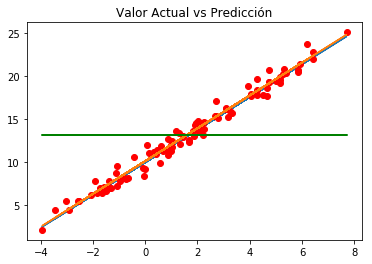

In [22]:
# Añadimos una horizontal en el promedio de las x
y_mean = [np.mean(y_act) for i in range(len(x_list))]
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, data['y_model'])
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Predicción")

Si ajustáramos $\beta$ a valores más pequeños, los datos se dispersarían más y la suma de errores cuadrados $R^2$ se alejaría de 1. Cuanto más se aleje de 1 el modelo de regresión sería menos adecuado para predecir valores.

In [23]:
x = 1.5 + 2.5 * np.random.randn(100)
res = 0 + 0.8 * np.random.randn(100)
y_pred = 10 + 0.3 * x
y_act = 10 + 0.3 * x + res

In [24]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [25]:
data = pd.DataFrame(
    {
        'x':x_list,
        'y_actual':y_act_list,
        'y_predic':y_pred_list
    }
)
data.head()

,x,y_actual,y_predic
0,-0.695029,9.051918,9.791491
1,-0.115811,8.974396,9.965257
2,0.790813,10.236719,10.237244
3,1.419923,10.798563,10.425977
4,1.973543,10.595006,10.592063


In [26]:
# Añadimos una horizontal en el promedio de las x
y_mean = [np.mean(y_act) for i in range(len(x_list))]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

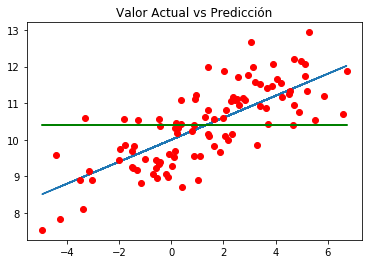

In [27]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Predicción")

Vemos los valores mucho más dispersos.

In [28]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_actual'])
x_mean, y_mean
data['beta_num'] = (data['x'] - x_mean) * (data['y_actual'] - y_mean)
data['beta_den'] = (data['x'] - x_mean)**2

In [29]:
beta = sum(data['beta_num']) / sum(data['beta_den'])
alpha = y_mean - beta * x_mean
alpha, beta

(9.980965061527783, 0.3152919043854686)

Vemos que esta vez la imprecisión es mayor. Ahora lo comprobamos con $R^2$

In [30]:
data['y_model'] = alpha + beta * data['x']
SSR = sum((data['y_model'] - y_mean)**2)
SSD = sum((data['y_model'] - data['y_actual'])**2)
SST = sum((data['y_actual'] - np.mean(y_act))**2)

In [31]:
R2 = SSR / SST
R2

0.5854333316344856

Vemos que ahora el error se aleja del 1, aunque también siguen una distribución normal, si bien, presentan una pequeña desviación de los datos hacia uno de los lados.

(array([ 5.,  9., 15., 13., 14., 23.,  6.,  9.,  3.,  3.]),
 array([-1.40601448, -1.09339385, -0.78077322, -0.46815259, -0.15553196,
         0.15708867,  0.4697093 ,  0.78232993,  1.09495056,  1.4075712 ,
         1.72019183]),
 <a list of 10 Patch objects>)

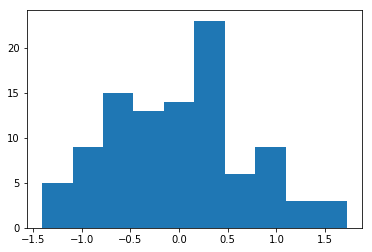

In [32]:
%matplotlib inline
plt.hist(data['y_actual']-data['y_model'])

Text(0.5, 1.0, 'Valor Actual vs Predicción')

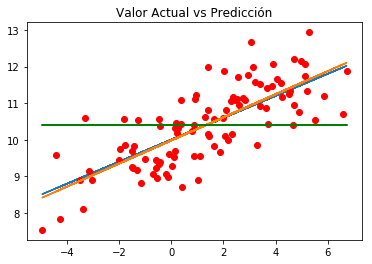

In [33]:
# Añadimos una horizontal en el promedio de las x
y_mean = [np.mean(y_act) for i in range(len(x_list))]
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, data['y_model'])
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Predicción")

Vemos como la recta de regresión del modelo no se ajusta a las condiciones de partida. Por tanto, **el modelo predictivo es malo**.

## Otras maneras de verificar la regresión lineal

Debemos considerar otros estadísticos que nos ayuden a verificar el ajuste de la regresión lineal.

### El p-valor

Al calcular $\alpha$ y $\beta$ lo que obtenemos son estimadores. Son estimaciones del modelo lineal, no representan cálculos excatos. Los valores pueden ser significativos o no.

Por lo tanto, emplearemos un contraste de hipótesis para valorar la significación de los parámetros (estimadores) obtenidos.

Este consiste en verificar si la $\beta$ (el que acompaña a la variable predictora $x$) es un parámetro lineal. Es decir, si es $0$.

Si se acercara mucho a este valor, el mejor predictor que tendríamos sería el promedio, con lo que quedaría que $Y_e = \alpha$ sin más.

Evaluaremos si existe una correlación entre la variable predictora y las predicciones. En caso de que exista (Cov positiva) $\beta$ no sería $0$. Entonces:

* $H_0 = \beta = 0$
* $H_1 \neq \beta = 0$

Cuando llevemos a cabo la regresión y calculemos $\beta$, habrá que acompañarla de un `t-estadístico` y un `p-valor` que confirmen la significancia de los resultados obtenidos.

Un `p-valor` menor que el valor de significación querrá decir que se rechaza $\beta_0$ y que, por tanto, existe una relación lineal.

_En una regresión múltiple (con varias predictoras y una predicción) el valor del `p-valor` situará a cada variable en un mayor grado de significación cuanto menor sea este estadístico_ 

### El estadístico F

En el caso de una regresión múltiple, cada variable predictora $x_i$ tendrá una $\beta_i$ diferente, que tendrá que ser calculada una por una. Así, además de comprobar la significancia de cada una de ellas con el `p-valor` para poder rechazar la $H_0$, también será requisito comprobar que el grupo de todas las variables predictoras juntas son significativas o no. 

Esto se hace con un nuevo contraste de hipótesis como se define a continuación:

\begin{cases}
H_0: \beta_1 = \beta_2 = \dots = \beta_k = 0 \\
H_1: \beta_i \neq \text{0 para algún i}
\end{cases}

El estadístico que se utiliza para validar este contraste de hipótesis se conoce como `Estadístico-F`, que sigue una distribución `F` de Fisher.

$F = \frac{SSR/k}{SSD/(n-k-1)}$ 

donde,
* `n`: es el número de filas
* `k`: es el número de variables predictoras

Nuevamente, si el `p-valor` es lo suficientemenete pequeño, podemos rechazar $H_0$ y por tanto, nos quedamos con la alternativa: algún $\beta_i \neq 0$.

### El error estándar residual

El $RSE$ es la desviación estándar del término del error (la desviación que se produce entre los datos que el modelo no puede explicar).

* **En el caso de una regresión lineal simple:**

$RSE = \sqrt{\frac{\sum{y_i-y(x_i)}^2}{n-2}}=\sqrt{\frac{SSD}{n-2}}$

* **En el caso de una regresión lineal múltiple:**

$RSE =\sqrt{\frac{SSD}{n-k-1}}$

donde,
* `n`: es el número de filas
* `k`: es el número de variables predictoras

En regresiones múltiples, lo que puede pasar es que se tomen demasiadas variables para el modelo y que el el `p-valor` sea demasiado alto y se pueda reducir tomando una menor cantidad de variables para el modelo.

Con el `RSE` ocurre al contrario. Cuantas más variables tomamos, menor es el error acumulado.

Volviendo al ejemplo de antes, podemos calcular el RSE de la siguiente forma.

In [34]:
RSE = np.sqrt(SSD/(len(data['x'])-2))
RSE

0.7027421836402578

Esta desviación típica, cuanto menor sea, mejor será nuestro modelo. La mejor forma de saber si es bueno o no es compararlo con el promedio de las `y` actuales.

In [35]:
np.mean(data['y_actual'])

10.40066829571445

El `RSE` en relación a este valor es suficientemenete pequeño.

In [36]:
perc = RSE / np.mean(data['y_actual'])*100
print("El error es de un %.2f%%"%(perc))

El error es de un 6.76%
